# House Price Advance Analysis

## CSDA 5310 Personal project.
## Presented by Anjesh Sahani*

In [41]:
##############################################################################################################
#Importing the required package for Analysis.
##############################################################################################################
#<----------------------------------------------------------------------------------------------------------->
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import sys

# Here, I am reading dataset from my computer and storing in df_1 and df_2 named dataframe.

In [42]:
#Reading dataset from 
#<----------------------------------------------------------------------------------------------------------->
df_1 = pd.read_csv("C:/Users/anjes/Desktop/FALL/Visualization/Wk8/dataset/train.csv")
df_2 = pd.read_csv("C:/Users/anjes/Desktop/FALL/Visualization/Wk8/dataset/test.csv")
###############################################################################################################


# Lets have overview of the data first

print("Total number of Row and Column in Train dataset is :" + str(df_1.shape))
print("<!-----------------------------------------------------------------------!>")
print("Total number of Row and Column in Test dataset is :" + str(df_2.shape))


#See, the result is 1460 row and 81 columns

Total number of Row and Column in Train dataset is :(1460, 81)
<!-----------------------------------------------------------------------!>
Total number of Row and Column in Test dataset is :(1459, 80)


# Now, first checking if there is SalesPrice present or not, if not create one and set value to 0. Also, merging both train and test dataset in one main dataframe for furthur analysis.

In [43]:
#Creating dummy SalesPrice columns setting inital value to 0.

if 'SalePrice' not in df_2.columns:
    df_2['SalePrice'] = 0
df = pd.concat([df_1,df_2], axis = 0)
df = df.set_index('Id')

# Printing the first 5 rows of data, so that we can have more understanding about data type and value.

In [44]:
#Lets have overview of the data first
df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


From above result its clear that there are some numric column, some categorical value and some column have NULL value, Now we have to find out which column contains how much NULL value and everything


# Looking for total Null value present in each column

In [45]:
#Disecting data and looking for in-consistency, like Null values, Missing vales etc.
df.isna().sum() 

#See, below there are multiple column that have NULL value.

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

# Now, looking through each column that has Null value greater than 0, and if so then store in df_null named dataframe

In [46]:
#Now, looking through each column that has Null value greater than 0
df_null = df[df.isnull().sum()[df.isnull().sum()>0].index]

In [47]:
#34 total columns that contains NULL values out of 80 columns
df_null.head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
2,RL,80.0,NaN,AllPub,MetalSd,MetalSd,NaN,0.0,Gd,TA,...,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
3,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD
4,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,NaN,0.0,TA,Gd,...,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD
5,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD


# In this Heat Map the barcode like line represent the presence of NULL value.

<Axes: ylabel='Id'>

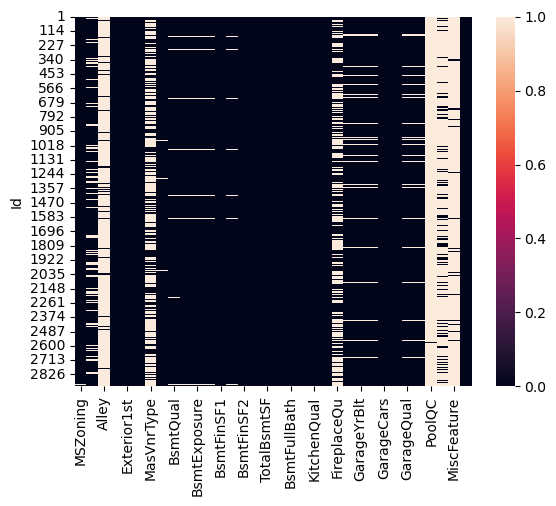

In [48]:
#Heatmap visualization for null value
sns.heatmap(df_null.isnull())

# Now, creating object columns to store categorical or string value other than numeric.
# Also, have to deal with the NULL values that present in Categorical columns.

In [49]:
#Now, creating object columns to store categorical string value other than numeric
#dealing with the NULL values that are present in Categorical columns, other than numeric
df_object = df[df.select_dtypes(include=['object']).columns]

#dropping those column in which there is more than one thousand NA value present, to maintain data quality
df = df.drop(df[df_object.isna().sum()[df_object.isna().sum()>1100].index], axis=1)

# Dropping those column in which there is more than 1100 NA value present, to maintain data quality and Filling NA value with String "null" to identify.

In [50]:
#Getting those column whose have less NA and filling with NULL string
df_object = df_object.drop(df_object[df_object.isna().sum()[df_object.isna().sum()>1100].index], axis=1)

#Filling with null 
df_object = df_object.fillna('null')

#Encoded object
df_object_encoded = pd.get_dummies(df_object) 

In [51]:
#example, checking inplace of NUll value null string is added or not.
df_object['Utilities'].value_counts()

Utilities
AllPub    2916
null         2
NoSeWa       1
Name: count, dtype: int64

# Dropping those column in which we just filled "null" as a String

In [52]:
#Dropping those column in which we just filled "null" as a String
#This steps is optional, either way okay, do or not.
for i in df_object_encoded.columns:
    if 'null' in i:
        df_object_encoded = df_object_encoded.drop(i, axis=1)
        print(i)

MSZoning_null
Utilities_null
Exterior1st_null
Exterior2nd_null
BsmtQual_null
BsmtCond_null
BsmtExposure_null
BsmtFinType1_null
BsmtFinType2_null
Electrical_null
KitchenQual_null
Functional_null
GarageType_null
GarageFinish_null
GarageQual_null
GarageCond_null
SaleType_null


In [53]:
#Stoging into new dataframe
new_df = pd.concat([df, df_object_encoded], axis=1)

In [54]:

# Checking the length of column, 
len(new_df.columns)

#-------------------------------
len(df.columns),
len(df_object_encoded.columns)

230

# Here, i want only those column which are not categorical value. So, i am accessing the main dataframe and droping categorical value. Now new_df dataframe contains only numerical value

In [55]:
#And Now, i want only those column which are not categorical value,
#So i am accessing the main dataframe and droping categorical value
#Now new_df dataframe contains only numerical value
new_df = new_df.drop(df.select_dtypes(include=['object']), axis = 1)

#condition for checking null value in every single column, and if it is turn out to be true then display,
new_df.isna().sum()[new_df.isna().sum()> 0]

#Means these are the numerical column but still have null value in these, so we have to deal with this.

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

Upon checking above still there is null value preset, now we have to deal wtih this.

#Here to deal with Null values, i am creating 2 list that appears to be mean and mode value list according to dataset instruction
#The reason i am creating this list to fill the NULL value with mode and mean value of respective columns, so that we will have consistent data

In [56]:

mode_columns =['GarageCars','GarageYrBlt','BsmtFullBath','BsmtHalfBath']
mean_columns =['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageArea']


#Now, looping through each mode_columns to fill the mode values in placcae of NA contains, and storing in new_df
for i in mode_columns:
    new_df[i] = new_df[i].fillna(new_df[i].mode()[0])
    

#Doing same for mean_columns
#Also, saying give mea rounded value if there is any double or float values exist
for i in mean_columns:
    new_df[i] = new_df[i].fillna(np.round(new_df[i].mean()))
    

#its time to check the new_df dataframe to see if there is still any NA value or  we are good.
new_df.isna().sum()[new_df.isna().sum()>0]

Series([], dtype: int64)

In [57]:
#Okay, so there is no NA value present in our new_df dataframe means we can proceed for furthur Expolotary data analysis
#To do so, lets first merge both tainning data and testing data into one place

#its like both are stacked on 1-100 and 100-end something like this.
#traning data will be lenght of df_1, starts from 0,
traning_data =new_df[0:len(df_1)] 

#now in this will be length of df_1 to end.
testing_data =new_df[len(df_1):]

#sicne this is traing data, we don't need the sales price column that we created in the beigning 
testing_data =testing_data.drop(columns = 'SalePrice')

# Importing package to create model and test, train to predict the sales price.

In [58]:
#This is the time for model traing section
#Based on the given metric, we will train data
import sys
!{sys.executable} -m pip install xgboost

#This will help to split data such like, i want to train on 80% of the data and keep 20% for testing, something like this
from sklearn.model_selection import train_test_split

#This metrics helps us to find how our data is performing basaed on what metrics, one can also choose f-square, there are so many metrics.
from sklearn.metrics import mean_squared_error

#this model; Linear regressing, we can also try polynomial regression
from sklearn.linear_model import LinearRegression

#this model Help to boost traing and testing
from xgboost import XGBRegressor

#Basically we are checking which model performing best among all these three model. Random forest for classification
from sklearn.ensemble import RandomForestRegressor

# Here, I am testing on 20% of the data, and rest of 80% i will use to train model that help to predict price.

In [81]:
#Temoprarly doping salesprice colums, since i am not saying inplace = TRUE.
X = traning_data.drop(columns='SalePrice')

#y data is Output level as a SalesPrice
y = traning_data['SalePrice']

#this X-test, and  y-test is out of our main traing_data itself, .20 means testing on 20% of data
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.20)

#Now, reshaping the data because the output we will get is one dimensional, but out model need two dimensional data
Y_train = np.reshape(Y_train,(-1,1))
Y_test = np.reshape(Y_test,(-1,1))

#Two dimensional data
X_train.shape, Y_train.shape

((1168, 266), (1168, 1))

In [104]:
print(y)

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64


# Model 1

In [60]:
#Lets try the first model, Linear Regression
Model_1 =LinearRegression()
Model_1.fit(X,y)
y_prediction = Model_1.predict(X_test)
mean_squared_error(Y_test, y_prediction)


#We are getting pretty high mean square error in momdel_1

589371000.8114573

=> Model 1 gives is giving high Error 364371546%, that means this model is not fit for our data.

# Model 2

In [61]:
#Setting learning rate, and estimator 
#
Model_2 = XGBRegressor(n_estimators = 1000, learing_rate =0.1)
Model_2.fit(X, y)
y_prediction = Model_2.predict(X_test)
mean_squared_error(Y_test, y_prediction)

#Lowest mean square error, This is the best fit model

c:\Users\anjes\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:13:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "learing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


0.0013721936369595462

=> Model 2 is giving only 0.0015% Error. which is really good fit to explain data.

# Model 3 Using Random Forest Regression Analysis

In [62]:
Model_3 = RandomForestRegressor(n_estimators = 100)
Model_3.fit(X, y)
y_prediction =Model_3.predict(X_test)
mean_squared_error(Y_test, y_prediction)

168112914.60747984

In [93]:
residuals = Y_test - y_prediction

=> Model 3 gives is giving high Error 88433718%, that means this model is not fit for our data.

# Conclusion => Model 2 is the best fit model because it shows only 0.0015% Error. Low is Best. This model predict price accurately with only 0.0015% Error.

# Visualizing the predicted price and original price 

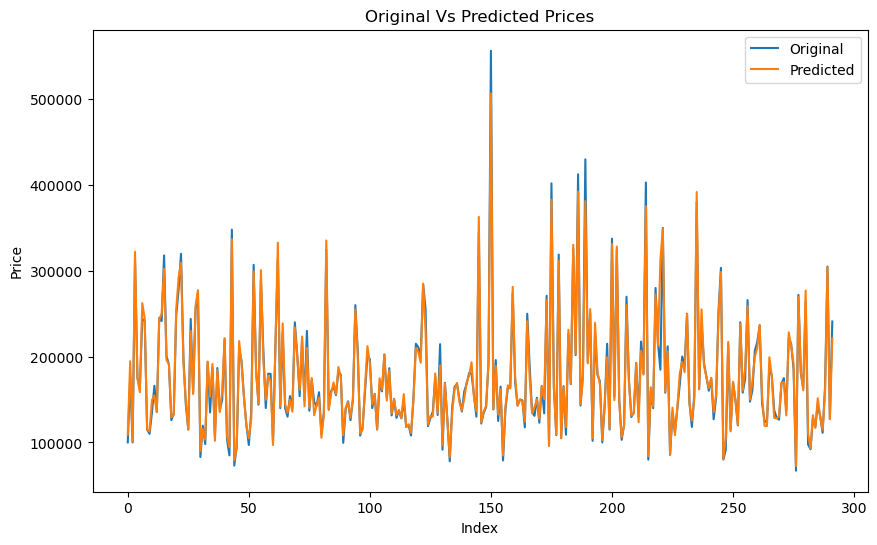

In [36]:
sort_indices = np.argsort(Y_test)

plt.figure(figsize=(10,6))
plt.plot(np.arange(len(Y_test)), Y_test, label = 'Original')
plt.plot(np.arange(len(Y_test)), y_prediction, label = 'Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title("Original Vs Predicted Prices")
plt.legend()
plt.show()

# Exporting the pridected SalesPrice into Excel file.

In [38]:
Predicted_Price = Model_2.predict(testing_data)
final = pd.DataFrame()
final['Id'] = testing_data.index
final['SalePrice'] = Predicted_Price

#Write Dataframe to a CSV
final.to_csv("output.csv", index = False)

# Simplifying to understand more easily

5 Point summary explain overall whole dataset

In [123]:
x_axis = traning_data.drop(columns='SalePrice')
y_axis = traning_data['SalePrice']

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64


In [116]:
# 5 Point summary inclues mean, max, std, percentile etc
traning_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.676027,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569155,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Histogram to check where the maximum value lies

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


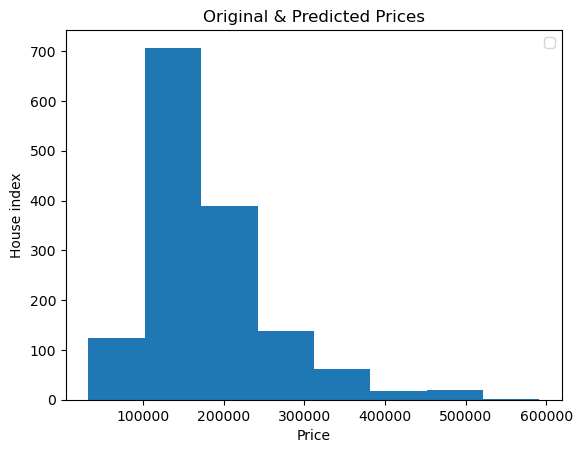

In [113]:
plt.histplot(final['SalePrice'], bins=8, rwidth=4)
plt.xlabel('Price')
plt.ylabel('House index')
plt.title("Original & Predicted Prices")
plt.legend()
plt.show()


#Below this histogram shows th maximum house price range lies between 110k to 250k dollar.

# Scatter plot

# Scatterplot between Residual and fitted value

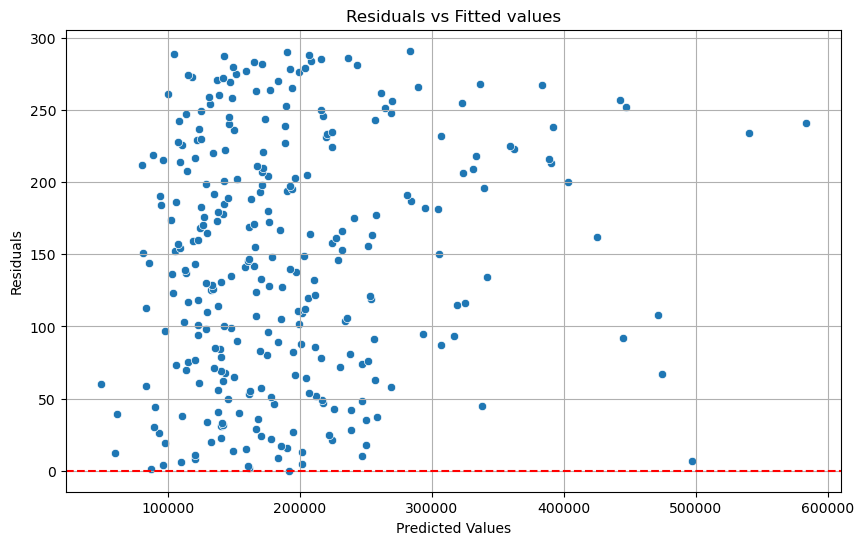

In [129]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_prediction, y=np.arange(len(residuals)))
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()


In [133]:
print(traning_data.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=267)


In [138]:
#Q.6 Create three different linear regression models using different subsets of independent variables.  Print the regression result for each.
model1 =sm.OLS.from_formula("SalePrice ~ MSSubClass + LotFrontage + LotArea + SaleCondition_Abnorml", traning_data)
result1 = model1.fit()
result1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     66.34
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           1.34e-51
Time:                        09:30:45   Log-Likelihood:                -18422.
No. Observations:                1460   AIC:                         3.685e+04
Df Residuals:                    1455   BIC:                         3.688e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      8.913e+04   8181.191     10.894      0.000    7.31e+04    1.05e+05
SaleCondition_Abnorml[T.True]  -3.34e+04   7549.281     -4.424      0.000   -4.82e+04   -1.86e+04
MSSubClass                       86.8653     48.498      1.791      0.073      -8.268     181.999
LotFrontage                    1063.6731     96.825     10.986      0.000     873.742    1253.605
LotArea                           1.4118      0.202      7.002      0.000       1.016       1.807
==============================================================================
Omnibus:                      533.008   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2957.396
Skew:                           1.607   Prob(JB):                         0.00
Kurtosis:                       9.188   Cond. No.                     6.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Plotting graphs againts each variable.

In [158]:
#Line plot
if isinstance(traning_data, pd.DataFrame):
    print("training_data is a DataFrame.")
else:
    print("training_data is not a DataFrame. Converting...")
    # Convert to DataFrame (assuming training_data is a compatible structure, like a list of dictionaries)
    traning_data = pd.DataFrame(traning_data)

training_data is a DataFrame.


# Boxplot SalesPrice with all the x-axis variable

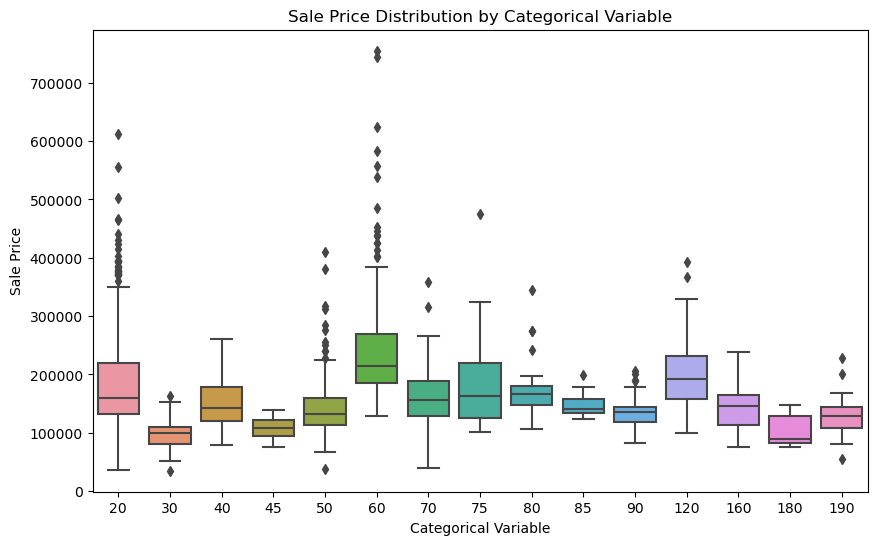

In [160]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=x_axis, y='SalePrice', data=traning_data)
plt.title('Sale Price Distribution by Categorical Variable')
plt.xlabel('Categorical Variable')
plt.ylabel('Sale Price')
plt.show()

# Plotting sales price againts 20 important variable to see which variabele influene price waht the relation

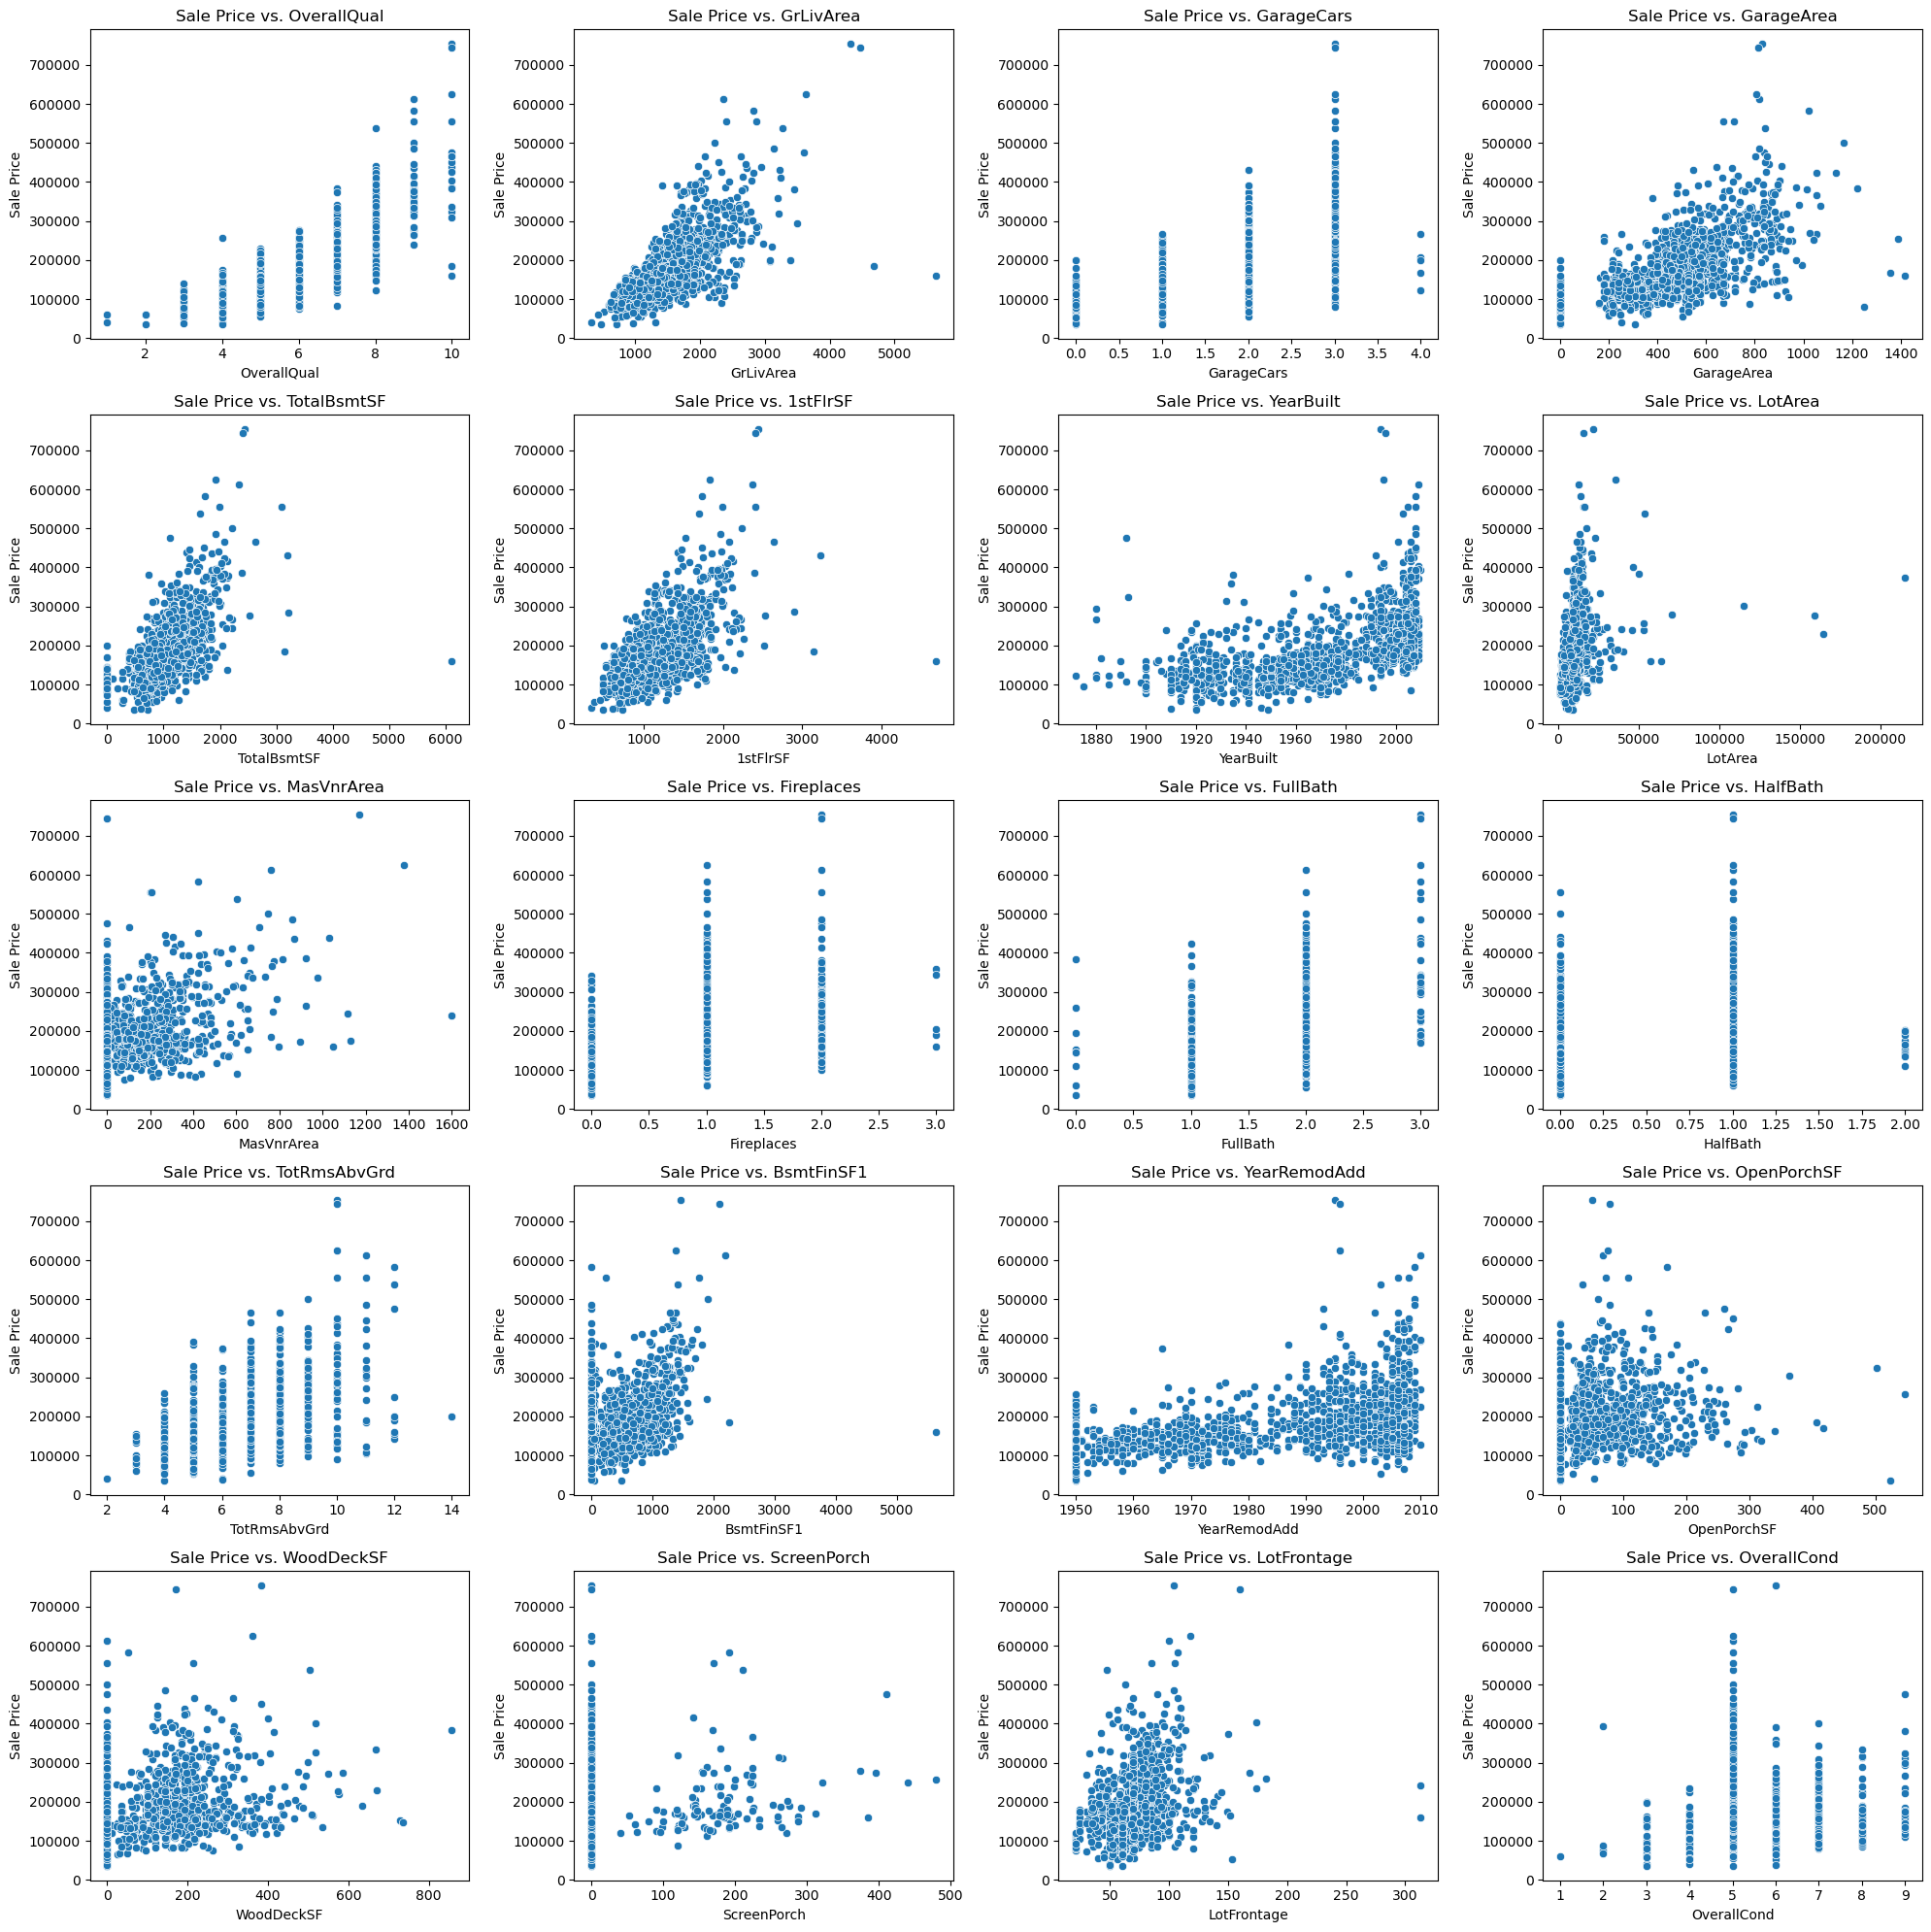

In [218]:
#Scatter plot
important_variable = [
    'OverallQual',    # Overall quality of the house
    'GrLivArea',      # Above ground living area
    'GarageCars',     # Number of cars in the garage
    'GarageArea',     # Garage size
    'TotalBsmtSF',    # Total basement area
    '1stFlrSF',      # First floor area
    'YearBuilt',      # Year built
    'LotArea',        # Lot size
    'MasVnrArea',     # Masonry veneer area
    'Fireplaces',     # Number of fireplaces
    'FullBath',       # Number of full bathrooms
    'HalfBath',       # Number of half bathrooms
    'TotRmsAbvGrd',   # Total rooms above ground
    'BsmtFinSF1',     # First floor finished area
    'YearRemodAdd',   # Year remodeled
    'OpenPorchSF',    # Open porch area
    'WoodDeckSF',     # Wood deck area
    'ScreenPorch',     # Screen porch area
    'LotFrontage',    # Linear feet of street connected to property
    'OverallCond'     # Overall condition of the house
]


# Set up the number of rows and columns for subplots
n_cols = 4  # Number of columns in the plot grid
n_rows = (len(important_variable) + n_cols - 1) // n_cols  # Calculate rows needed


plt.figure(figsize=(20, n_rows * 4))  
# Adjust height based on number of rows

# Loop through each variable in x_axis
for i, var in enumerate(important_variable):
    # Creating subplot here
    plt.subplot(n_rows, n_cols, i + 1)  
    sns.scatterplot(x=traning_data[var], y=traning_data['SalePrice'])
    plt.title('Sale Price vs. ' + var)
    plt.xlabel(var)
    plt.ylabel('Sale Price')

plt.tight_layout()
plt.show()



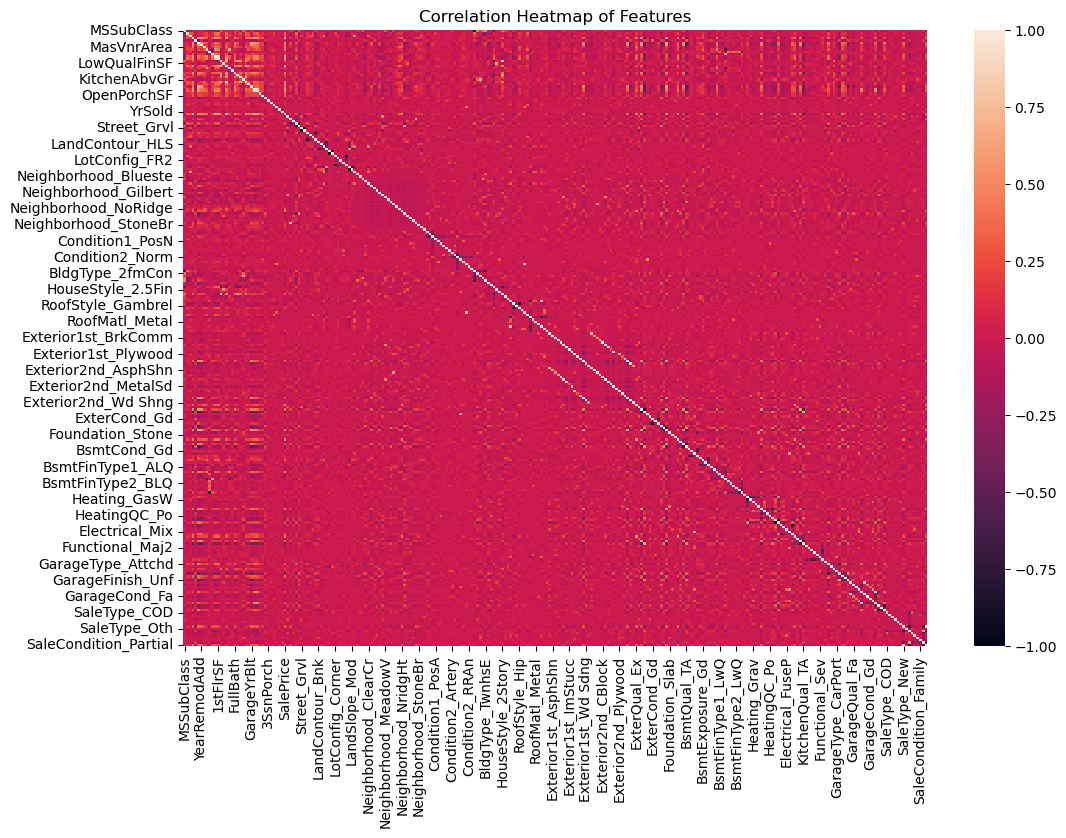

In [193]:
plt.figure(figsize=(12, 8))
correlation_matrix = traning_data.corr()
sns.heatmap(correlation_matrix)
plt.title('Correlation Heatmap of Features')
plt.show()


c:\Users\anjes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


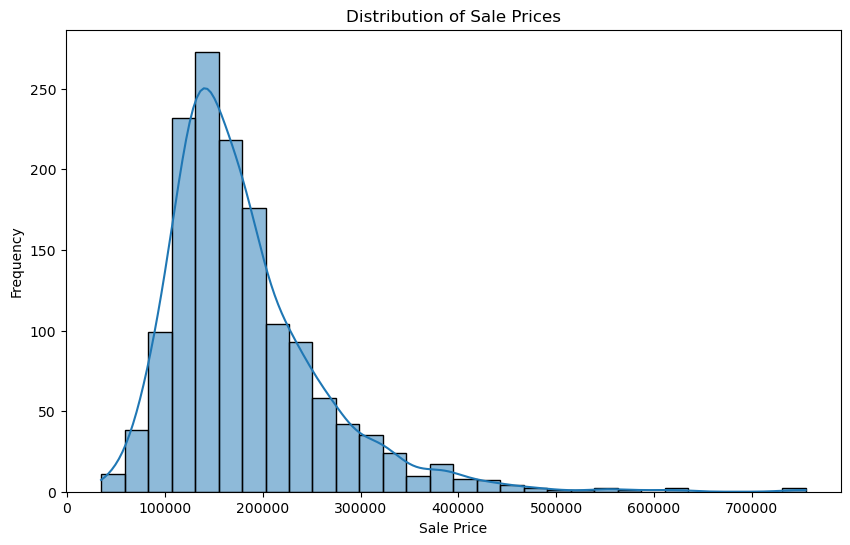

In [199]:
plt.figure(figsize=(10, 6))
sns.histplot(traning_data['SalePrice'], bins=30, kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


c:\Users\anjes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


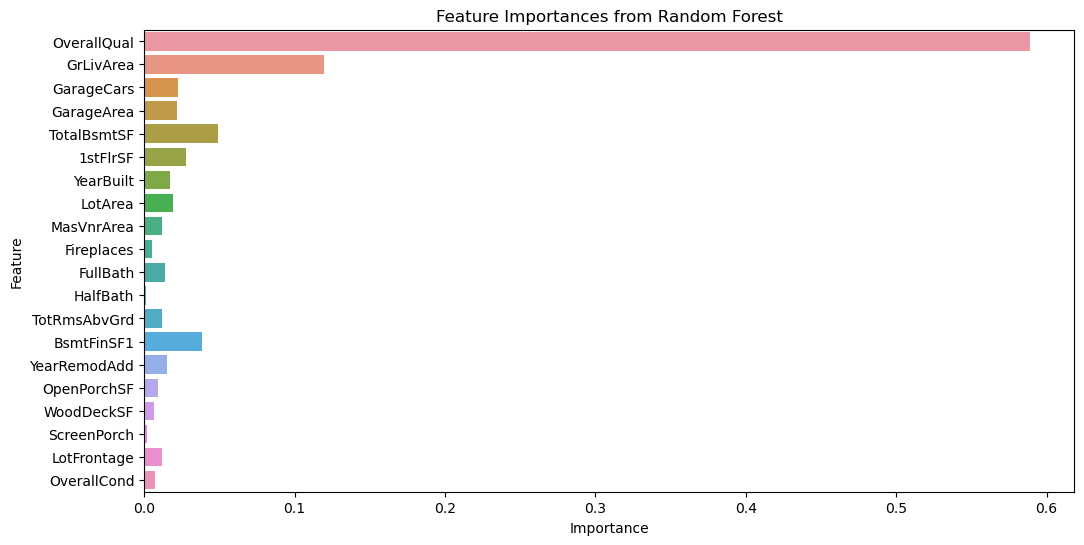

In [205]:
from sklearn.ensemble import RandomForestRegressor

# Prepare features and target
X = traning_data[important_variable]
y = traning_data['SalePrice']

# Fit Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=important_variable)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

